cost =  0.65097654
cost =  0.44147632
cost =  0.4243992
cost =  0.42429432
cost =  0.42429376
cost =  0.42429328
cost =  0.42429295
cost =  0.42429247
cost =  0.42429212
cost =  0.42429164
cost =  0.42429125
cost =  0.42429093
cost =  0.4242905
cost =  0.42429012
cost =  0.42428973
cost =  0.42428935
cost =  0.424289
cost =  0.4242886
cost =  0.42428824
cost =  0.4242879


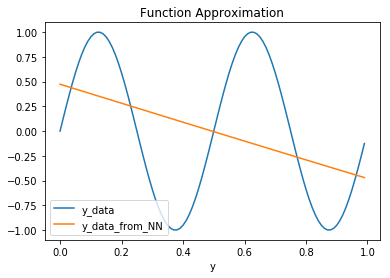

In [70]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

#approximation property of neural network
x_data = np.ones([100, 1])
y_data = np.ones([100, 1])
for i in range(100) :
    x_data[i] = float(i) / 100.0
    y_data[i] = np.sin(4.0 * np.pi * x_data[i])


x_input_pc = tf.placeholder(tf.float32, shape=[None,1], name="x-input")
y_target_pc = tf.placeholder(tf.float32, shape=[None,1], name="y-input")

rand_uni = tf.random_uniform_initializer(-1e-1, 1e-1)
#print(tf.shape(rand_uni))
# build a graph

w1 = tf.Variable(rand_uni([1,100]))
w2 = tf.Variable(rand_uni([100,1]))

bias1 = tf.Variable(rand_uni([100]))
bias2 = tf.Variable(rand_uni([1]))

h1_output=tf.add(tf.matmul(x_input_pc,w1),bias1)
h1_sigmoid=tf.nn.sigmoid(h1_output)

y_output=tf.add(tf.matmul(h1_sigmoid,w2),bias2)

error = (y_target_pc - y_output)

cost = tf.reduce_mean(tf.multiply(error, error), name="cost")

# node of tensorflow
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.04).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init)


#train
for i in range(20000):
    y_output_from_NN, cost_nn, _ = sess.run([y_output, cost, train_step], feed_dict={x_input_pc: x_data, y_target_pc: y_data})
    if i % 1000 == 0:
        print("cost = ", cost_nn)

np.set_printoptions(precision=1)

#draw
plt.title("Function Approximation")
plt.xlabel('x')
plt.xlabel('y')

plt.plot(x_data, y_data, label = "y_data")
plt.plot(x_data, y_output_from_NN, label = "y_data_from_NN")

plt.legend()
plt.savefig('Function_Approximation.png', bbox_inches='tight', format='png', dpi=300, pad_inches=0,transparent=True)
plt.show()